<a href="https://colab.research.google.com/github/vincha4evr/SistInteligentes/blob/edward/Copia_de_Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Te damos la bienvenida a Colab</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Novedad&#41; Prueba la API de Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Si ya conoces Colab, echa un vistazo a este vídeo para obtener información sobre las tablas interactivas, la vista del historial de código ejecutado y la paleta de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  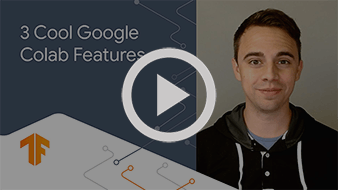
  </a>
</center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import csv
import pandas as pd
import numpy as np
import io
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Cargar datos de Fallecidos, Hospitalizados, Vacunados

df = pd.read_csv('/content/drive/MyDrive/MyDrive/pm27Sep2023.csv', encoding='utf8',sep=';' )
#df = pd.read_csv('/content/drive/MyDrive/fallecidos_covid_v3.csv',encoding='utf8')  # Roberto
#df = pd.read_csv('https://raw.githubusercontent.com/verajulio823/covid_fallecidos/master/fallecidos_covid_v4.csv', encoding='utf8')
df.head()



Mounted at /content/drive


,FECHA_CORTE,UUID,FECHA_MUESTRA,EDAD,SEXO,INSTITIUTCION,UBIGEO_PACIENTE,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,DEPARTAMENTO_MUESTRA,PROVINCIA_MUESTRA,DISTRITO_MUESTRA,TIPO_MUESTRA,RESULTADO
0,20230927,12978089.0,20200724,26,FEMENINO,PRIVADO,140137.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO,LIMA,LIMA,SAN BORJA,HISOPADO NASAL Y FARINGEO,NEGATIVO
1,20230927,19929263.0,20200901,27,MASCULINO,PRIVADO,250104.0,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
2,20230927,35827358.0,20200901,33,MASCULINO,PRIVADO,140133.0,LIMA,LIMA,JESUS MARIA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
3,20230927,16667400.0,20200901,46,MASCULINO,PRIVADO,240106.0,,CALLAO,VENTANILLA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
4,20230927,21465620.0,20200826,39,MASCULINO,PRIVADO,140140.0,LIMA,LIMA,SAN BORJA,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO


In [ ]:
# Columnas a eliminar
DROP_COLUMNS = [
    'INSTITIUTCION',
    'UUID'


]


# Columnas categóricas a mantener
COL_CATEGORICAS = [
    'SEXO',
    'UBIGEO_PACIENTE',
    'DEPARTAMENTO_PACIENTE',
    'PROVINCIA_PACIENTE',
    'DISTRITO_PACIENTE',
    'DEPARTAMENTO_MUESTRA',
    'PROVINCIA_MUESTRA',
    'DISTRITO_MUESTRA',
    'TIPO_MUESTRA',
    'RESULTADO',
    'FECHA_CORTE'
]

# Columnas numéricas a mantener
COL_NUMERICO = [
    'EDAD'
]

# Eliminar columnas no deseadas
df.drop(columns=DROP_COLUMNS, inplace=True)


KeyError: "['INSTITIUTCION', 'UUID'] not found in axis"

In [ ]:
# Eliminar filas donde la columna 'departamento_paciente' tiene valores nulos
df_cleaned = df.dropna(subset=['departamento_paciente'])

In [ ]:
df.head()


,FECHA_CORTE,FECHA_MUESTRA,EDAD,SEXO,UBIGEO_PACIENTE,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,DEPARTAMENTO_MUESTRA,PROVINCIA_MUESTRA,DISTRITO_MUESTRA,TIPO_MUESTRA,RESULTADO
0,20230927,20200724,26,FEMENINO,140137.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO,LIMA,LIMA,SAN BORJA,HISOPADO NASAL Y FARINGEO,NEGATIVO
1,20230927,20200901,27,MASCULINO,250104.0,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
2,20230927,20200901,33,MASCULINO,140133.0,LIMA,LIMA,JESUS MARIA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
3,20230927,20200901,46,MASCULINO,240106.0,,CALLAO,VENTANILLA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
4,20230927,20200826,39,MASCULINO,140140.0,LIMA,LIMA,SAN BORJA,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO


In [ ]:
# prompt: delete the rows where UBIGEO_PACIENTE is null

import pandas as pd
df = df[pd.notnull(df['UBIGEO_PACIENTE'])]

# prompt: show me how many rows are so far

print(f"There are {df.shape[0]} rows in the DataFrame.")



There are 1048574 rows in the DataFrame.


In [ ]:
# prompt: delete rows where PROVINCIA_PACIENTE is null

import pandas as pd
df = df[pd.notnull(df['PROVINCIA_PACIENTE'])]
print(f"There are {df.shape[0]} rows in the DataFrame.")


There are 1048566 rows in the DataFrame.


In [ ]:
# prompt: select how many rows have PROVINCIA_PACIENTE is null

null_provincia_count = df['PROVINCIA_PACIENTE'].isnull().sum()
print(f"There are {null_provincia_count} rows where PROVINCIA_PACIENTE is null.")


There are 0 rows where PROVINCIA_PACIENTE is null.


In [ ]:
import pandas as pd
df = df[pd.notnull(df['PROVINCIA_PACIENTE'])]

df = df[pd.notnull(df['DISTRITO_PACIENTE'])]

print(f"There are {df.shape[0]} rows in the DataFrame.")


There are 1048566 rows in the DataFrame.


In [ ]:
df[df.isnull().any(axis=1)]


,FECHA_CORTE,FECHA_MUESTRA,EDAD,SEXO,UBIGEO_PACIENTE,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,DEPARTAMENTO_MUESTRA,PROVINCIA_MUESTRA,DISTRITO_MUESTRA,TIPO_MUESTRA,RESULTADO


In [ ]:
# prompt: delete rows where EDAD is iqual or under 15

df = df[df['EDAD'] > 15]

# prompt: delete rows wehre EDAD is beyond 90

df = df[df['EDAD'] <= 90]

print(f"There are {df.shape[0]} rows in the DataFrame.")
df.head(50)

There are 1008718 rows in the DataFrame.


,FECHA_CORTE,FECHA_MUESTRA,EDAD,SEXO,UBIGEO_PACIENTE,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,DEPARTAMENTO_MUESTRA,PROVINCIA_MUESTRA,DISTRITO_MUESTRA,TIPO_MUESTRA,RESULTADO
0,20230927,20200724,26,FEMENINO,140137.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO,LIMA,LIMA,SAN BORJA,HISOPADO NASAL Y FARINGEO,NEGATIVO
1,20230927,20200901,27,MASCULINO,250104.0,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
2,20230927,20200901,33,MASCULINO,140133.0,LIMA,LIMA,JESUS MARIA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
3,20230927,20200901,46,MASCULINO,240106.0,,CALLAO,VENTANILLA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
4,20230927,20200826,39,MASCULINO,140140.0,LIMA,LIMA,SAN BORJA,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO
5,20230927,20200826,58,MASCULINO,40127.0,AREQUIPA,AREQUIPA,JACOBO HUNTER,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO
6,20230927,20200826,53,MASCULINO,40103.0,AREQUIPA,AREQUIPA,CERRO COLORADO,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO
7,20230927,20200824,32,MASCULINO,80312.0,HUANCAVELICA,ANGARAES,CCOCHACCASA,LIMA,LIMA,SANTIAGO DE SURCO,HISOPADO NASAL Y FARINGEO,NEGATIVO
8,20230927,20200824,32,MASCULINO,80302.0,HUANCAVELICA,ANGARAES,ANCHONGA,LIMA,LIMA,SANTIAGO DE SURCO,HISOPADO NASAL Y FARINGEO,NEGATIVO
9,20230927,20200724,51,FEMENINO,230103.0,TUMBES,TUMBES,LA CRUZ,TUMBES,TUMBES,TUMBES,HISOPADO NASAL Y FARINGEO,NEGATIVO


In [ ]:
print("Valores nulos antes de rellenar:")
print(df['DEPARTAMENTO_PACIENTE'].isnull().sum())

# Rellenar valores nulos
df['DEPARTAMENTO_PACIENTE'] = df['DEPARTAMENTO_PACIENTE'].fillna('CALLAO')

# Verificar valores nulos después de rellenar
print("Valores nulos después de rellenar:")
print(df['DEPARTAMENTO_PACIENTE'].isnull().sum())

# Mostrar algunas filas para verificar visualmente
print(df.head(50))


Valores nulos antes de rellenar:
0
Valores nulos después de rellenar:
0
    FECHA_CORTE  FECHA_MUESTRA  EDAD       SEXO  UBIGEO_PACIENTE  \
0      20230927       20200724    26   FEMENINO         140137.0   
1      20230927       20200901    27  MASCULINO         250104.0   
2      20230927       20200901    33  MASCULINO         140133.0   
3      20230927       20200901    46  MASCULINO         240106.0   
4      20230927       20200826    39  MASCULINO         140140.0   
5      20230927       20200826    58  MASCULINO          40127.0   
6      20230927       20200826    53  MASCULINO          40103.0   
7      20230927       20200824    32  MASCULINO          80312.0   
8      20230927       20200824    32  MASCULINO          80302.0   
9      20230927       20200724    51   FEMENINO         230103.0   
10     20230927       20200724    57   FEMENINO         230304.0   
11     20230927       20200723    32   FEMENINO         100103.0   
12     20230927       20200729    46   FEMEN

In [ ]:
# Verificar valores nulos antes de rellenar
print("Valores nulos antes de rellenar:")
print(df['DEPARTAMENTO_PACIENTE'].isnull().sum())

# Rellenar valores nulos
df['DEPARTAMENTO_PACIENTE'] = df['DEPARTAMENTO_PACIENTE'].fillna('CALLAO')

# Verificar valores nulos después de rellenar
print("Valores nulos después de rellenar:")
print(df['DEPARTAMENTO_PACIENTE'].isnull().sum())

# Verificar cuántas filas tienen cadenas vacías o espacios en blanco
empty_strings_count = df['DEPARTAMENTO_PACIENTE'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()
print(f"Filas con cadenas vacías o espacios en blanco: {empty_strings_count}")

# Reemplazar cadenas vacías o espacios en blanco con 'CALLAO'
df['DEPARTAMENTO_PACIENTE'] = df['DEPARTAMENTO_PACIENTE'].apply(lambda x: 'CALLAO' if isinstance(x, str) and x.strip() == '' else x)

# Verificar nuevamente cuántas filas tienen cadenas vacías o espacios en blanco
empty_strings_count_after = df['DEPARTAMENTO_PACIENTE'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()
print(f"Filas con cadenas vacías o espacios en blanco después del reemplazo: {empty_strings_count_after}")

# Mostrar algunas filas para verificar visualmente
df.head(50)

Valores nulos antes de rellenar:
0
Valores nulos después de rellenar:
0
Filas con cadenas vacías o espacios en blanco: 24146
Filas con cadenas vacías o espacios en blanco después del reemplazo: 0


,FECHA_CORTE,FECHA_MUESTRA,EDAD,SEXO,UBIGEO_PACIENTE,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,DEPARTAMENTO_MUESTRA,PROVINCIA_MUESTRA,DISTRITO_MUESTRA,TIPO_MUESTRA,RESULTADO
0,20230927,20200724,26,FEMENINO,140137.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO,LIMA,LIMA,SAN BORJA,HISOPADO NASAL Y FARINGEO,NEGATIVO
1,20230927,20200901,27,MASCULINO,250104.0,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
2,20230927,20200901,33,MASCULINO,140133.0,LIMA,LIMA,JESUS MARIA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
3,20230927,20200901,46,MASCULINO,240106.0,CALLAO,CALLAO,VENTANILLA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
4,20230927,20200826,39,MASCULINO,140140.0,LIMA,LIMA,SAN BORJA,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO
5,20230927,20200826,58,MASCULINO,40127.0,AREQUIPA,AREQUIPA,JACOBO HUNTER,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO
6,20230927,20200826,53,MASCULINO,40103.0,AREQUIPA,AREQUIPA,CERRO COLORADO,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO
7,20230927,20200824,32,MASCULINO,80312.0,HUANCAVELICA,ANGARAES,CCOCHACCASA,LIMA,LIMA,SANTIAGO DE SURCO,HISOPADO NASAL Y FARINGEO,NEGATIVO
8,20230927,20200824,32,MASCULINO,80302.0,HUANCAVELICA,ANGARAES,ANCHONGA,LIMA,LIMA,SANTIAGO DE SURCO,HISOPADO NASAL Y FARINGEO,NEGATIVO
9,20230927,20200724,51,FEMENINO,230103.0,TUMBES,TUMBES,LA CRUZ,TUMBES,TUMBES,TUMBES,HISOPADO NASAL Y FARINGEO,NEGATIVO


In [ ]:
# Mostrar cantidad de filas antes de eliminar
print(f"Total de filas antes de eliminar: {df.shape[0]}")

# Eliminar filas donde DEPARTAMENTO_PACIENTE es igual a 'NO DEFINIDO'
df = df[df['DEPARTAMENTO_PACIENTE'] != '[NO DEFINIDO]']

# Mostrar cantidad de filas después de eliminar
print(f"Total de filas después de eliminar: {df.shape[0]}")

# Verificar que se eliminaron correctamente
print(df[df['DEPARTAMENTO_PACIENTE'] == '[NO DEFINIDO]'])

df_ubigeo_paciente_null = df[df['DEPARTAMENTO_PACIENTE'] == 'CALLAO']

# Mostrar algunas filas para verificar
print(df_ubigeo_paciente_null.head(50))

# Mostrar la cantidad de filas seleccionadas
print(f"Total de filas con DEPARTAMENTO_PACIENTE igual a 'CALLAO': {df_ubigeo_paciente_null.shape[0]}")


Total de filas antes de eliminar: 1008718
Total de filas después de eliminar: 1008709
Empty DataFrame
Columns: [FECHA_CORTE, FECHA_MUESTRA, EDAD, SEXO, UBIGEO_PACIENTE, DEPARTAMENTO_PACIENTE, PROVINCIA_PACIENTE, DISTRITO_PACIENTE, DEPARTAMENTO_MUESTRA, PROVINCIA_MUESTRA, DISTRITO_MUESTRA, TIPO_MUESTRA, RESULTADO]
Index: []
      FECHA_CORTE  FECHA_MUESTRA  EDAD       SEXO  UBIGEO_PACIENTE  \
3        20230927       20200901    46  MASCULINO         240106.0   
13       20230927       20200731    69   FEMENINO         240101.0   
28       20230927       20200724    44  MASCULINO         240105.0   
29       20230927       20200724    26  MASCULINO         240102.0   
40       20230927       20200717    33   FEMENINO         240101.0   
176      20230927       20200824    61  MASCULINO         240101.0   
207      20230927       20210723    30  MASCULINO         240106.0   
213      20230927       20211013    49   FEMENINO         240106.0   
220      20230927       20211013    24   FEME

In [ ]:
# Verificar cuántas filas tienen cadenas vacías o espacios en blanco
empty_strings_count = df['PROVINCIA_PACIENTE'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()
print(f"Filas con cadenas vacías o espacios en blanco: {empty_strings_count}")
empty_strings_count = df['DEPARTAMENTO_PACIENTE'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()
print(f"Filas con cadenas vacías o espacios en blanco: {empty_strings_count}")
empty_strings_count = df['DISTRITO_PACIENTE'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()
print(f"Filas con cadenas vacías o espacios en blanco: {empty_strings_count}")
# Verificar valores nulos antes de rellenar
print("Valores nulos antes de rellenar:")
print(df['DEPARTAMENTO_PACIENTE'].isnull().sum())
print("Valores nulos antes de rellenar:")
print(df['PROVINCIA_PACIENTE'].isnull().sum())
print("Valores nulos antes de rellenar:")
print(df['DISTRITO_PACIENTE'].isnull().sum())

Filas con cadenas vacías o espacios en blanco: 2
Filas con cadenas vacías o espacios en blanco: 0
Filas con cadenas vacías o espacios en blanco: 2
Valores nulos antes de rellenar:
0
Valores nulos antes de rellenar:
0
Valores nulos antes de rellenar:
0


In [ ]:
# Eliminar las filas donde 'PROVINCIA_PACIENTE' y 'DISTRITO_PACIENTE' son cadenas vacías
df_filtrado = df[(df['PROVINCIA_PACIENTE'].str.strip() != '') & (df['DISTRITO_PACIENTE'].str.strip() != '')]

# Verificar valores nulos después de filtrar
print("Valores nulos después de filtrar:")
print(df_filtrado['DEPARTAMENTO_PACIENTE'].isnull().sum())
print(df_filtrado['PROVINCIA_PACIENTE'].isnull().sum())
print(df_filtrado['DISTRITO_PACIENTE'].isnull().sum())

# Verificar recuentos de cadenas vacías después del filtrado
empty_strings_count = df_filtrado['PROVINCIA_PACIENTE'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()
print(f"Filas con cadenas vacías o espacios en blanco en 'PROVINCIA_PACIENTE': {empty_strings_count}")
empty_strings_count = df_filtrado['DISTRITO_PACIENTE'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()
print(f"Filas con cadenas vacías o espacios en blanco en 'DISTRITO_PACIENTE': {empty_strings_count}")

empty_strings_count = df_filtrado['DISTRITO_PACIENTE'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()
print(f"Filas con cadenas vacías o espacios en blanco en 'PROVINCIA_PACIENTE': {empty_strings_count}")

# Obtener el total de filas en el DataFrame filtrado
total_filas = len(df_filtrado)

# Mostrar el total de filas
print(f"Total de filas después del filtrado: {total_filas}")


Valores nulos después de filtrar:
0
0
0
Filas con cadenas vacías o espacios en blanco en 'PROVINCIA_PACIENTE': 0
Filas con cadenas vacías o espacios en blanco en 'DISTRITO_PACIENTE': 0
Filas con cadenas vacías o espacios en blanco en 'PROVINCIA_PACIENTE': 0
Total de filas después del filtrado: 1008707


In [ ]:
df.head(50)

,FECHA_CORTE,FECHA_MUESTRA,EDAD,SEXO,UBIGEO_PACIENTE,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,DEPARTAMENTO_MUESTRA,PROVINCIA_MUESTRA,DISTRITO_MUESTRA,TIPO_MUESTRA,RESULTADO
0,20230927,20200724,26,FEMENINO,140137.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO,LIMA,LIMA,SAN BORJA,HISOPADO NASAL Y FARINGEO,NEGATIVO
1,20230927,20200901,27,MASCULINO,250104.0,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
2,20230927,20200901,33,MASCULINO,140133.0,LIMA,LIMA,JESUS MARIA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
3,20230927,20200901,46,MASCULINO,240106.0,CALLAO,CALLAO,VENTANILLA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
4,20230927,20200826,39,MASCULINO,140140.0,LIMA,LIMA,SAN BORJA,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO
5,20230927,20200826,58,MASCULINO,40127.0,AREQUIPA,AREQUIPA,JACOBO HUNTER,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO
6,20230927,20200826,53,MASCULINO,40103.0,AREQUIPA,AREQUIPA,CERRO COLORADO,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO
7,20230927,20200824,32,MASCULINO,80312.0,HUANCAVELICA,ANGARAES,CCOCHACCASA,LIMA,LIMA,SANTIAGO DE SURCO,HISOPADO NASAL Y FARINGEO,NEGATIVO
8,20230927,20200824,32,MASCULINO,80302.0,HUANCAVELICA,ANGARAES,ANCHONGA,LIMA,LIMA,SANTIAGO DE SURCO,HISOPADO NASAL Y FARINGEO,NEGATIVO
9,20230927,20200724,51,FEMENINO,230103.0,TUMBES,TUMBES,LA CRUZ,TUMBES,TUMBES,TUMBES,HISOPADO NASAL Y FARINGEO,NEGATIVO


In [ ]:
import datetime as dt

# Convertir la columna 'FECHA_MUESTRA' a formato datetime
df['FECHA_MUESTRA'] = pd.to_datetime(df['FECHA_MUESTRA'], format='%Y%m%d')

# Función para determinar la estación del año en el hemisferio sur
def get_season(date):
    year = date.year
    seasons = {
        'Verano': (dt.date(year, 12, 21), dt.date(year + 1, 3, 20)),
        'Otoño': (dt.date(year, 3, 21), dt.date(year, 6, 20)),
        'Invierno': (dt.date(year, 6, 21), dt.date(year, 9, 22)),
        'Primavera': (dt.date(year, 9, 23), dt.date(year, 12, 20)),
    }
    if seasons['Verano'][0] <= date <= seasons['Verano'][1]:
        return 'Verano'
    elif seasons['Otoño'][0] <= date <= seasons['Otoño'][1]:
        return 'Otoño'
    elif seasons['Invierno'][0] <= date <= seasons['Invierno'][1]:
        return 'Invierno'
    else:
        return 'Primavera'

# Aplicar la función a la columna 'FECHA_MUESTRA'
df['ESTACION'] = df['FECHA_MUESTRA'].apply(lambda x: get_season(x.date()))

df[['FECHA_MUESTRA', 'ESTACION']].head(100)


,FECHA_MUESTRA,ESTACION
0,2020-07-24,Invierno
1,2020-09-01,Invierno
2,2020-09-01,Invierno
3,2020-09-01,Invierno
4,2020-08-26,Invierno
...,...,...
95,2020-09-14,Invierno
96,2020-09-14,Invierno
97,2020-09-24,Primavera
98,2020-09-24,Primavera


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Codificar el resultado de la prueba
label_encoder = LabelEncoder()
df['RESULTADO_CODIFICADO'] = label_encoder.fit_transform(df['RESULTADO'])

# Crear variables dummy para las estaciones del año
df_dummies = pd.get_dummies(df['ESTACION'], drop_first=True)

# Unir las dummies al DataFrame original
df = pd.concat([df, df_dummies], axis=1)

# Variables independientes y dependientes
X = df_dummies
y = df['RESULTADO_CODIFICADO']

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Ver los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

           Coeficiente
Otoño        -0.038759
Primavera    -0.112921
Verano       -0.068370


In [ ]:
df.head(100)

,FECHA_CORTE,FECHA_MUESTRA,EDAD,SEXO,UBIGEO_PACIENTE,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,DEPARTAMENTO_MUESTRA,PROVINCIA_MUESTRA,DISTRITO_MUESTRA,TIPO_MUESTRA,RESULTADO,ESTACION,RESULTADO_CODIFICADO,Otoño,Primavera,Verano
0,20230927,2020-07-24,26,FEMENINO,140137.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO,LIMA,LIMA,SAN BORJA,HISOPADO NASAL Y FARINGEO,NEGATIVO,Invierno,0,False,False,False
1,20230927,2020-09-01,27,MASCULINO,250104.0,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO,Invierno,0,False,False,False
2,20230927,2020-09-01,33,MASCULINO,140133.0,LIMA,LIMA,JESUS MARIA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO,Invierno,0,False,False,False
3,20230927,2020-09-01,46,MASCULINO,240106.0,CALLAO,CALLAO,VENTANILLA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO,Invierno,0,False,False,False
4,20230927,2020-08-26,39,MASCULINO,140140.0,LIMA,LIMA,SAN BORJA,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO,Invierno,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20230927,2020-09-14,77,MASCULINO,140130.0,LIMA,LIMA,SANTIAGO DE SURCO,LIMA,LIMA,LINCE,HISOPADO NASAL Y FARINGEO,POSITIVO,Invierno,1,False,False,False
96,20230927,2020-09-14,24,MASCULINO,20325.0,ANCASH,BOLOGNESI,HUALLANCA,LIMA,LIMA,LINCE,HISOPADO NASAL Y FARINGEO,NEGATIVO,Invierno,0,False,False,False
97,20230927,2020-09-24,27,FEMENINO,170101.0,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,AREQUIPA,AREQUIPA,CERRO COLORADO,HISOPADO NASAL Y FARINGEO,NEGATIVO,Primavera,0,False,True,False
98,20230927,2020-09-24,36,MASCULINO,40119.0,AREQUIPA,AREQUIPA,SOCABAYA,AREQUIPA,AREQUIPA,CERRO COLORADO,HISOPADO NASAL Y FARINGEO,NEGATIVO,Primavera,0,False,True,False


<ipython-input-25-812e9a026b53>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pruebas_por_estacion.index, y=pruebas_por_estacion.values, palette='viridis')


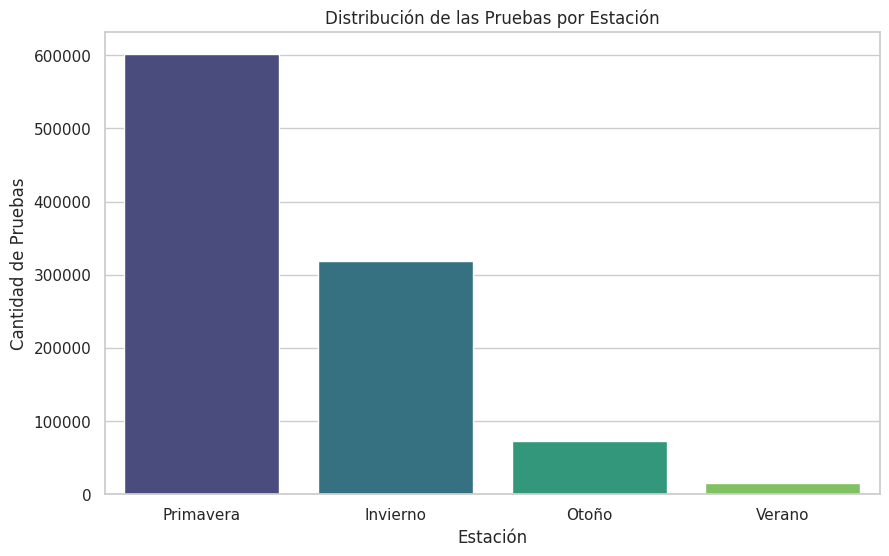

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Contar la cantidad de pruebas por estación
pruebas_por_estacion = df['ESTACION'].value_counts()

# Crear una gráfica de barras para visualizar la distribución de las pruebas por estación
plt.figure(figsize=(10, 6))
sns.barplot(x=pruebas_por_estacion.index, y=pruebas_por_estacion.values, palette='viridis')
plt.title('Distribución de las Pruebas por Estación')
plt.xlabel('Estación')
plt.ylabel('Cantidad de Pruebas')
plt.show()


<ipython-input-26-76e8410a783f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients['Coeficiente'], palette='viridis')


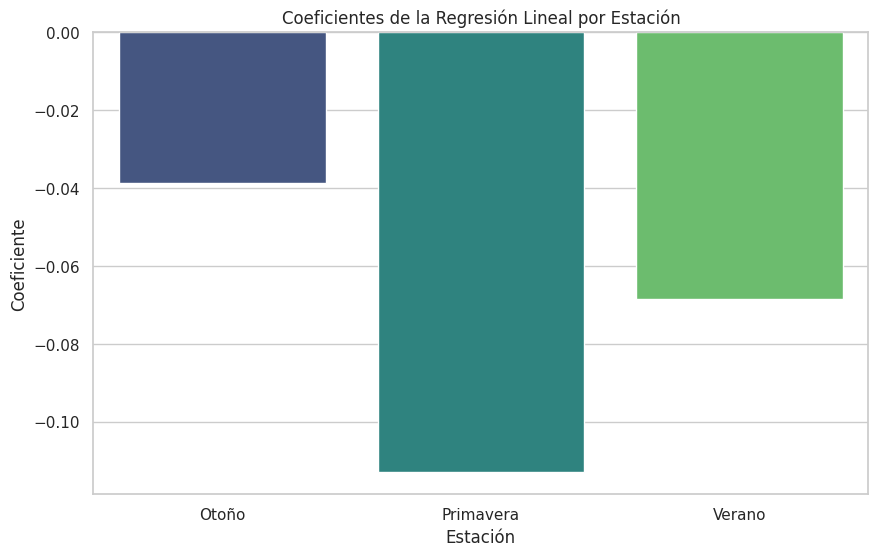

In [ ]:
# Crear una gráfica de barras para visualizar los coeficientes de la regresión
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients['Coeficiente'], palette='viridis')
plt.title('Coeficientes de la Regresión Lineal por Estación')
plt.xlabel('Estación')
plt.ylabel('Coeficiente')
plt.show()


In [ ]:
# Descripción estadística de las columnas numéricas
print(df.describe())

# Análisis de las frecuencias de las categorías
print(df['SEXO'].value_counts())
print(df['RESULTADO'].value_counts())
print(df['DEPARTAMENTO_PACIENTE'].value_counts())

<div class="markdown-google-sans">
  <h2>¿Qué es Colaboratory?</h2>
</div>

Colab, también conocido como "Colaboratory", te permite programar y ejecutar Python en tu navegador con las siguientes ventajas:
- No requiere configuración
- Acceso a GPUs sin coste adicional
- Permite compartir contenido fácilmente

Colab puede facilitar tu trabajo, ya seas <strong>estudiante</strong>, <strong>científico de datos</strong> o <strong>investigador de IA</strong>. No te pierdas el vídeo de <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introducción a Colab</a> para obtener más información. O simplemente empieza con los pasos descritos más abajo.

<div class="markdown-google-sans">

## <strong>Primeros pasos</strong>
</div>

El documento que estás leyendo no es una página web estática, sino un entorno interactivo denominado <strong>cuaderno de Colab</strong> que te permite escribir y ejecutar código.

Por ejemplo, a continuación se muestra una <strong>celda de código</strong> con una breve secuencia de comandos de Python que calcula un valor, lo almacena en una variable e imprime el resultado:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Si quieres ejecutar el código de la celda anterior, haz clic para seleccionarlo y pulsa el botón de reproducir situado a la izquierda del código o usa la combinación de teclas "Comando/Ctrl + Intro". Para editar el código, solo tienes que hacer clic en la celda.

Las variables que definas en una celda se pueden usar después en otras celdas:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Los cuadernos de Colab te permiten combinar <strong>código ejecutable</strong> y <strong>texto enriquecido</strong> en un mismo documento, además de <strong>imágenes</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> y mucho más. Los cuadernos que creas en Colab se almacenan en tu cuenta de Google Drive. Puedes compartir tus cuadernos de Colab fácilmente con compañeros de trabajo o amigos, lo que les permite comentarlos o incluso editarlos. Consulta más información en <a href="/notebooks/basic_features_overview.ipynb">Información general sobre Colab</a>. Para crear un cuaderno de Colab, puedes usar el menú Archivo que aparece arriba o bien acceder al enlace para <a href="http://colab.research.google.com#create=true">crear un cuaderno de Colab</a>.

Los cuadernos de Colab son cuadernos de Jupyter alojados en Colab. Para obtener más información sobre el proyecto Jupyter, visita <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciencia de datos
</div>

Con Colab, puedes aprovechar toda la potencia de las bibliotecas más populares de Python para analizar y visualizar datos. La celda de código de abajo utiliza <strong>NumPy</strong> para generar datos aleatorios y <strong>Matplotlib</strong> para visualizarlos. Para editar el código, solo tienes que hacer clic en la celda.

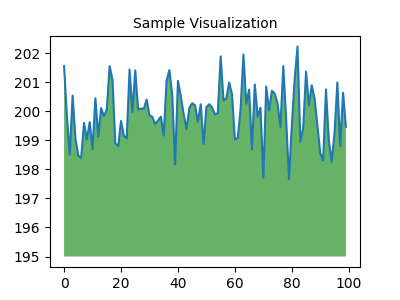

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Puedes importar tus propios datos a los cuadernos de Colab desde tu cuenta de Google Drive, incluidas las hojas de cálculo, y también desde GitHub y muchas fuentes más. Para obtener más información sobre cómo importar datos y cómo se puede usar Colab en la ciencia de datos, consulta los enlaces que aparecen en la sección <a href="#working-with-data">Trabajar con datos</a> más abajo.

<div class="markdown-google-sans">

## Aprendizaje automático
</div>

Con Colab, puedes importar un conjunto de datos de imágenes, entrenar un clasificador de imágenes con dicho conjunto de datos y evaluar el modelo con tan solo usar unas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">pocas líneas de código</a>. Los cuadernos de Colab ejecutan código en los servidores en la nube de Google, lo que te permite aprovechar la potencia del hardware de Google, incluidas las <a href="#using-accelerated-hardware">GPU y TPU</a>, independientemente de la potencia de tu equipo. Lo único que necesitas es un navegador.

Colab es una herramienta muy utilizada en la comunidad de aprendizaje automático. Estos son algunos ejemplos de las aplicaciones que tiene Colab:
- Dar los primeros pasos con TensorFlow
- Desarrollar y entrenar redes neuronales
- Experimentar con TPUs
- Divulgar datos de investigación sobre IA
- Crear tutoriales

Para ver cuadernos de Colab que demuestran las aplicaciones del aprendizaje automático, consulta los <a href="#machine-learning-examples">ejemplos de aprendizaje automático</a> de abajo.

<div class="markdown-google-sans">

## Más recursos

### Trabajar con cuadernos en Colab

</div>

- [Información general sobre Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guía de Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependencias](/notebooks/snippets/importing_libraries.ipynb)
- [Guardar y cargar cuadernos en GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formularios interactivos](/notebooks/forms.ipynb)
- [Widgets interactivos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Trabajar con datos
</div>

- [Cargar datos: Drive, Hojas de cálculo y Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualización de datos](/notebooks/charts.ipynb)
- [Primeros pasos con BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de aprendizaje automático

<div>

A continuación, se muestran algunos cuadernos del curso online de Google sobre aprendizaje automático. Para obtener más información, consulta el <a href="https://developers.google.com/machine-learning/crash-course/">sitio web del curso completo</a>.
- [Introducción a Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regresión lineal con tf.keras usando datos sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Uso de hardware acelerado
</div>

- [TensorFlow con GPUs](/notebooks/gpu.ipynb)
- [TensorFlow con TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Ejemplos destacados

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">Reemplaza voces con NeMo</a>: usa NeMo, el kit de herramientas de IA conversacional de Nvidia, para sustituir una voz de un fragmento de audio por otra generada por ordenador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Reentrenamiento de un clasificador de imágenes</a>: crea un modelo de Keras sobre un clasificador de imágenes preparado previamente para que distinga flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Clasificación de textos</a>: clasifica las reseñas de películas de IMDb en <em>positivas</em> o <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferencia de estilo</a>: utiliza el aprendizaje profundo para transferir el estilo de una imagen a otra.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Codificador universal de frases multilingüe para preguntas y respuestas</a>: utiliza un modelo de aprendizaje automático para contestar preguntas con el conjunto de datos SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolación de vídeo</a>: predice lo que ocurre entre el primer y el último fotograma de un vídeo.
